# Decision Trees with the ID3 Algorithm
#### By Jonathan L. Moran (jo6155mo-s@student.lu.se)
From the EDAN95 - Applied Machine Learning course given at Lunds Tekniska Högskola (LTH) | Ht2 2019.

## 1. Built in Scikit-learn `DecisionTreeClassifier`
Use and experiment with the built-in SciKitLearn `DecisionTreeClassifier` (based on CART)...

### Scikit-learn digits dataset

_1. Use the code skeleton / snippets provided or the notebook used in the tutorial from the first course week to load the digits dataset from the datasets provided in SciKitLearn. Inspect the data. What is in there?_

Recall that the `digits` dataset consists of 1797 samples across 10 classes. Each sample is an 8x8 image of a single handwritten digit 0 to 9. Each sample therefore has 64 features, where each of the 64 features is a brightness value of a pixel in the image.

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def visualize_random(images, labels, examples_per_class=8):
    """
    Display a sample of randomly selected images per class
    """
    number_of_classes = len(np.unique(labels))
    
    for cls in range(number_of_classes):
        idxs = np.where(labels == cls)[0]
        idxs = np.random.choice(idxs, examples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow(images[idx].astype('uint8'), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
    plt.show()

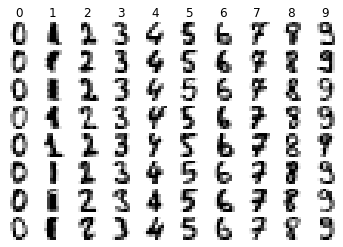

In [6]:
visualize_random(digits.images, digits.target, examples_per_class=8)

_2. Split your data set into 70% training data (features and labels), and 30% test data._

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [9]:
print("Number of training examples: ",len(X_train))
print("Number of test examples: ",len(X_test))
print("Number of total examples:", len(digits.data))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


**NOTE**: We would typically rescale the images' pixel values prior to running the data through our model. In the case of the `digits` data, the pixel values are in the range `[0-16]`. In order to rescale the images, we would divide the pixel values by a factor equal to the maximum pixel value (`16.0`). This would transform every pixel value from the range `[0-16]` to `[0,1]`.

Rescaling, in general cases, is important for two main reasons: 
1. Maintaining consistency across datasets whose images have differing pixel ranges, and
2. Preserving the learning rate across the data.

Without scaling, images with higher pixel ranges contribute more to the loss than those with lower ranges. The learning rate cannot update effectively to compensate for this if the images have different or high ranges.

Now, with that out of the way–we **will not** be scaling the `digits` data for use with the ID3-algorithm. Decision trees are said to be invariant to feature scaling, and in the case of the ID3-algorithm, scaling the image data to continuous values could actually result in overfitting (many more branch points at each split). Continuous attribute values like scaled pixel intensities can also be more time-consuming to process with the ID3-algorithm (source: [Wikipedia](https://en.wikipedia.org/wiki/ID3_algorithm#Properties)).

### Scikit-learn `DecisionTreeClassifier`

_3. Set up a `DecisionTreeClassifier` as it comes in SciKitLearn. Use it with default parameters to train a decision tree classifier for the `digits` dataset based on the training data. Follow the tutorial (or the respective documentation) and produce a plot of the tree with `graphviz` if you have it available (if not, see tips below the ID3 algorithm). What can you learn from this about how the used algorithm handles the data?_

In [10]:
from sklearn import tree

In [11]:
# Initialising with default parameters
classifier = tree.DecisionTreeClassifier()

In [12]:
# Fitting the decision tree on training set
sklearnDigitsTree = classifier.fit(X_train, y_train)

In [13]:
# Visualising the tree using scikit-learn
from sklearn.tree import plot_tree, export_text

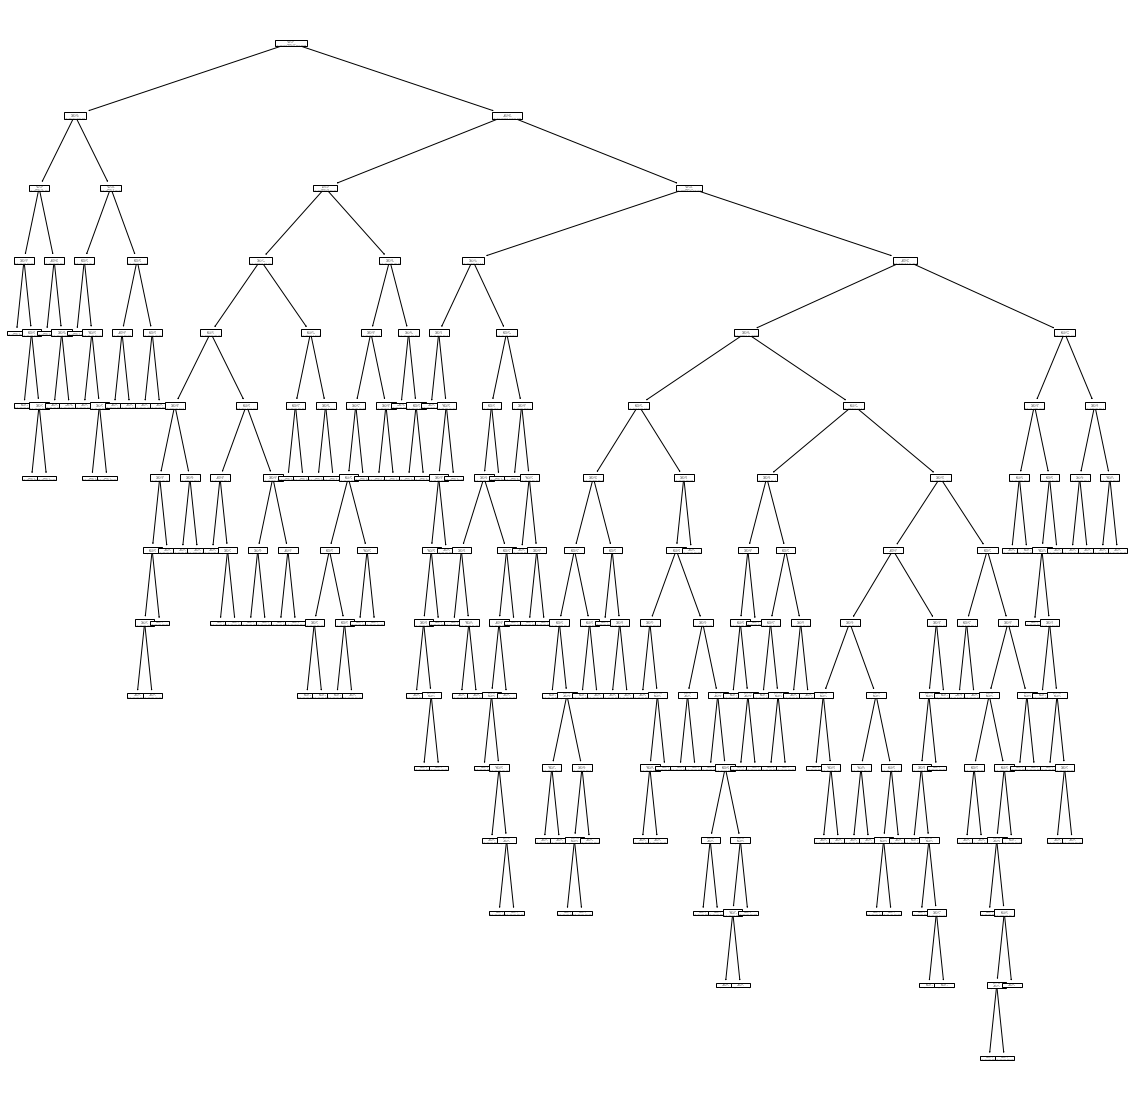

In [14]:
plt.figure(figsize=(20,20))
tree.plot_tree(sklearnDigitsTree)
plt.show()

In [15]:
# Installing tree visualisation library
!pip install graphviz

_4. Test the classifier with the remaining test data and analyse it using the metrics packages of SciKitLearn (`classification_report`, `confusion_matrix`). What do you see?_

In [16]:
# Prediction run over test data
y_pred = classifier.predict(X_test)

In [17]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Scikit-learn DecisionTreeClassifier on digits dataset... 

----------Classification Report-----
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.85      0.87      0.86        67
           2       0.82      0.86      0.84        57
           3       0.86      0.79      0.82        62
           4       0.89      0.80      0.85        51
           5       0.86      0.86      0.86        51
           6       0.91      0.91      0.91        46
           7       0.89      0.87      0.88        54
           8       0.72      0.72      0.72        54
           9       0.68      0.75      0.71        56

    accuracy                           0.83       540
   macro avg       0.83      0.83      0.83       540
weighted avg       0.83      0.83      0.83       540

----------Confusion Matrix----------


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca244a45d0>)

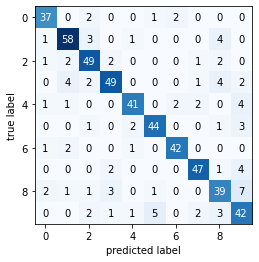

In [18]:
print('Scikit-learn DecisionTreeClassifier on digits dataset... \n')
print('-'*10 + 'Classification Report' + '-'*5)
print(metrics.classification_report(y_test, y_pred))
print('-'*10 + 'Confusion Matrix' + '-'*10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred))

Plotting the test images and their predicted labels...

In [19]:
def visualize_predictions(images, labels, examples_per_class):
    """
    Display a sample of randomly selected images and their predicted labels
    """
    number_of_classes = len(np.unique(labels))
    for cls in range(number_of_classes):
        idxs = np.where(labels == cls)[0]
        idxs = np.random.choice(idxs, examples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow(images[idx].astype('uint8'), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            if i == 0:
                plt.title('%s' % str(cls))
    plt.show()

In [20]:
# Reshape test data to 3D
X_test_images = X_test.reshape((len(X_test),8,8))

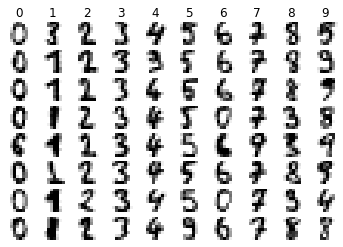

In [21]:
visualize_predictions(X_test_images, y_pred, examples_per_class=8)

### Modifiying the Scikit-learn `DecisionTreeClassifier`

_5. Change the parameters of the classifier, e.g., the minimum number of samples in a leaf / for a split, to see how the tree and the results are affected._

Parameters modified:
*  `criterion`: specifies the function to use to measure the quality of a split.

We'll first modify the Scikit-learn Decision Tree Classifier by specifiying `entropy` as our function to split attributes with. This allows us to calculate _information gain_ for each attribute rather than the scikit-learn default of Gini impurity. The resulting classifier's performance can be compared to our vanilla implementation of the ID3-algorithm which also uses information gain. We'll cover this in the later part of this notebook.




In [22]:
# Use information gain to determine split
classifier = tree.DecisionTreeClassifier(criterion='entropy')

In [23]:
# Fitting decision tree on training set
id3esqueTree = classifier.fit(X_train, y_train)

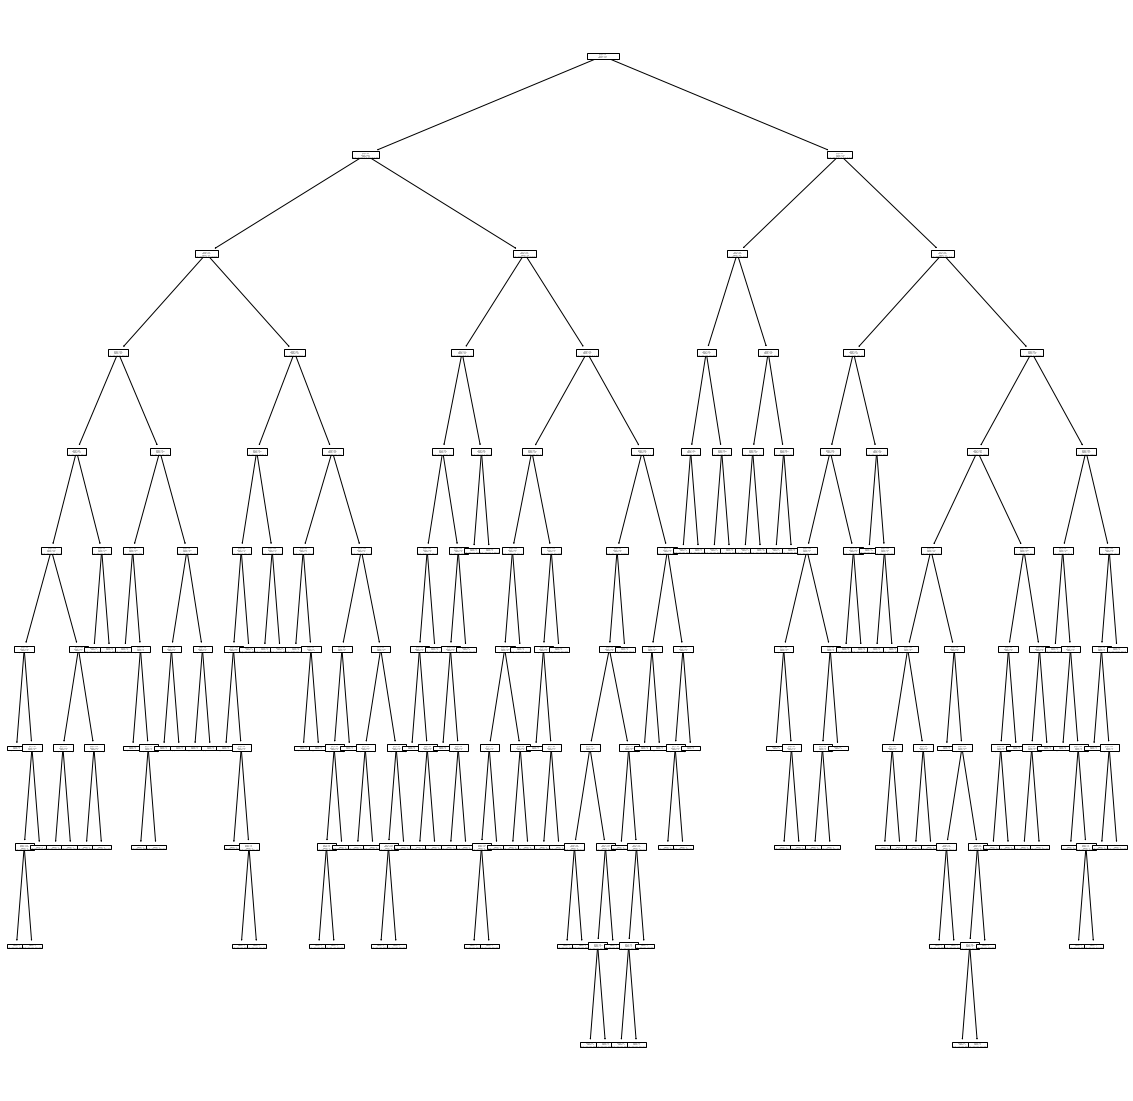

In [24]:
# Visualise the new tree
plt.figure(figsize=(20,20))
tree.plot_tree(id3esqueTree)
plt.show()

In [25]:
# Predicting over the test set
y_pred = id3esqueTree.predict(X_test)

Scikit-learn DecisionTreeClassifier (using information gain) on digits dataset... 

----------Classification Report-----
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.91      0.93      0.92        67
           2       0.85      0.89      0.87        57
           3       0.91      0.79      0.84        62
           4       0.77      0.80      0.79        51
           5       0.82      0.92      0.87        51
           6       0.84      0.93      0.89        46
           7       0.90      0.87      0.89        54
           8       0.85      0.81      0.83        54
           9       0.85      0.80      0.83        56

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.86      0.86      0.86       540

----------Confusion Matrix----------


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca27a694d0>)

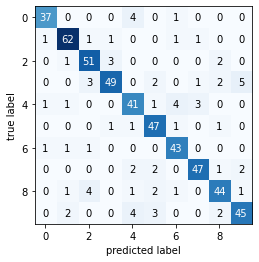

In [26]:
print('Scikit-learn DecisionTreeClassifier (using information gain) on digits dataset... \n')
print('-'*10 + 'Classification Report' + '-'*5)
print(metrics.classification_report(y_test, y_pred))
print('-'*10 + 'Confusion Matrix' + '-'*10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred))

Parameters modified:
*  `max_depth`: the maximum depth of the tree (default is until all nodes are leaves).
*  `min_samples_split`: the minimum number of samples to split an internal node.
*  `min_samples_leaf`: the minimum number of samples required to be at a leaf node.

There are a few reasons why we would want to modify the above parameters in practice. Let's start with `max_depth`. The theoretical maximum depth of a decision tree is one less than the number of samples in the training set. A decision tree with this depth is, however, undesirable. The deeper the tree grows, the more complex the model becomes. The more attribute splits there are, the higher than chance of _overfitting_ of the training data. Thus, reducing the maximum depth of the decision tree is one way to prevent overfitting.

In [27]:
def test_depth(X_train, X_test, y_train, y_test, max_depth=10):
    """
    Calculates the average F1 score over ten training runs for each model variation.
    Each model is tested with a max_depth from 10 to max_depth, inclusive.
    """
    f1_scores = {}
    for i in range(10, max_depth+1):
        f1s = []
        for exp in range(10):
            model = tree.DecisionTreeClassifier(max_depth=i)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            # Multi-class F1 requires 'macro' or 'weighted' average
            # We choose 'macro' as our training set is relatively balanced
            f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))
        f1_scores[i] = np.mean(f1s)
    return f1_scores

In [28]:
f1_scores = test_depth(X_train, X_test, y_train, y_test, max_depth=20)

In [29]:
f1_scores

{10: 0.8255066438493455,
 11: 0.828891827000634,
 12: 0.8359822695062018,
 13: 0.8384320636531083,
 14: 0.8378365992198138,
 15: 0.8387338595773024,
 16: 0.8390173943613817,
 17: 0.8326775589981545,
 18: 0.8380512664651445,
 19: 0.8375311944922424,
 20: 0.834311118686531}

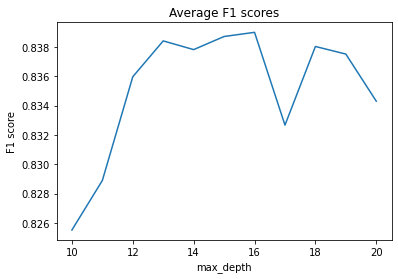

In [30]:
plt.figure()
plt.plot(list(f1_scores.keys()), list(f1_scores.values()))
plt.title('Average F1 scores')
plt.xlabel('max_depth')
plt.ylabel('F1 score')
plt.show()

In [31]:
# Get max_depth of model with highest average F1 score
best_depth = max(f1_scores, key=lambda x: f1_scores[x])

In [32]:
best_depth

16

In [33]:
from sklearn.model_selection import GridSearchCV

To find the best performing model, we will use Scikit-learn’s `GridSearchCV`. This handy method allows us to test each hyperparameter combination on a given classifier and find the best combination from the parameter grid we specified. This works by exhaustively searching the parameter space using cross-validation method. One limitation to this approach is that we have to manually set a range of values to try for each hyperparameter. To better determine this, consult a research paper that uses a similar model and dataset. We chose our value ranges from the recommendations in [this](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) blog post on tuning decision trees.

In [34]:
# Parameters to test
params = {'max_depth': range(10,21),
          'min_samples_split': range(1,41),
          'min_samples_leaf': range(1,21)}

In [35]:
# Perform cross-validated grid-search over parameter grid
grid = GridSearchCV(tree.DecisionTreeClassifier(),
                    # Parameters and their values to test in dict format 
                    param_grid=params,
                    # Cross-validation method (int=k folds for KFold)
                    cv=10,
                    # Number of jobs to run in parallel (-1 uses all processors)
                    n_jobs=-1,
                    # Print computation time for each fold and parameter candidate
                    verbose=1,
                    # Include training scores in cv_results_
                    return_train_score=True)

In [36]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 8800 candidates, totalling 88000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 3402 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 6202 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9802 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 14202 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 19402 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 25402 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 32202 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 39802 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 48202 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 57402 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 67402 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 78202 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 88000 

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(10, 21),
                         '

In [37]:
import joblib
# Save the GridSearchCV object
joblib.dump(grid, 'grid_search_cv.pkl')
# Load model if already trained
#joblib.load("model_file_name.pkl")

['grid_search_cv.pkl']

In [38]:
# Parameter setting that gave the best results
grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [39]:
# Mean cross-validated score of the best estimator
grid.best_score_

0.8528126984126985

Using the following method, we can visualise the mean score of each hyperparameter value stored in the nested dictionary object.

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

In [41]:
def plot_search_results(grid, interactive=True):
    """
    Plot the mean scores per parameter evaluated with GridSearchCV
    Params:
        grid: trained GridSearchCV object
        interactive: boolean indicating whether or not to use Plotly 
    """
    # GridSearchCV results
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']
    # Hyperparameter value indicies
    masks = []
    mask_names = list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    params = grid.param_grid
    if interactive is True:
        # Plot results with Plotly
        fig = make_subplots(rows=1, cols=len(params), subplot_titles=mask_names, shared_xaxes=False, shared_yaxes=True)
        for i, p in enumerate(mask_names):
            m = np.stack(masks[:i] + masks[i+1:])
            best_params_mask = m.all(axis=0)
            best_index = np.where(best_params_mask)[0]
            x = np.array(params[p])
            y_1 = np.array(means_test[best_index])
            e_1 = np.array(stds_test[best_index])
            y_2 = np.array(means_train[best_index])
            e_2 = np.array(stds_train[best_index])
            fig.add_trace(go.Scatter(x=x, y=y_1, error_y=dict(type='data', array=e_1), legendgroup="test_group", name='test'), row=1, col=i+1)
            fig.add_trace(go.Scatter(x=x, y=y_2, error_y=dict(type='data', array=e_2), legendgroup="train_group", name='train'), row=1, col=i+1)
        fig.update_layout(title_text='Scores per parameter for DecisionTreeClassifier', showlegend=True)
        fig.update_yaxes(title_text='Mean score', row=1, col=1)
        fig.show()
        pio.write_html(fig, file='cv_scores.html', auto_open=True)
    else:
        # Plot results with Matplotlib
        fig, ax = plt.subplots(1, len(params), sharex='none', sharey='all', figsize=(20,5))
        fig.suptitle('Scores per parameter for DecisionTreeClassifier')
        fig.text(0.04, 0.5, 'Mean score', va='center', rotation='vertical')
        param_performance_best = {}
        for i, p in enumerate(mask_names):
            m = np.stack(masks[:i] + masks[i+1:])
            param_performance_best
            best_params_mask = m.all(axis=0)
            best_index = np.where(best_params_mask)[0]
            x = np.array(params[p])
            y_1 = np.array(means_test[best_index])
            e_1 = np.array(stds_test[best_index])
            y_2 = np.array(means_train[best_index])
            e_2 = np.array(stds_train[best_index])
            ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
            ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
            ax[i].set_xlabel(p.upper())
        plt.legend()
        plt.show()

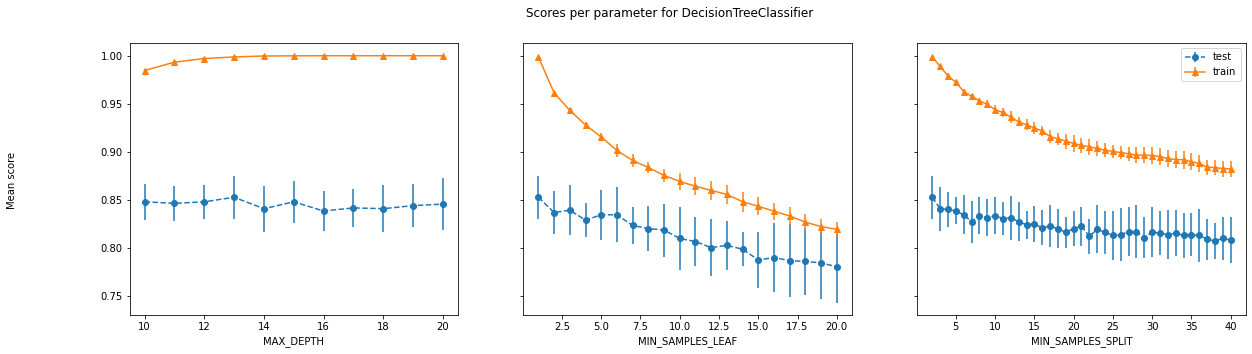

In [42]:
# Plot GridSearchCV parameter scores with Matplotlib
plot_search_results(grid, interactive=False)

In [43]:
# Plot GridSearchCV parameter scores with Plotly
plot_search_results(grid, interactive=True)

In [44]:
# Initialising with best parameters
best_classifier = tree.DecisionTreeClassifier(**grid.best_params_)

In [45]:
best_classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
# Fitting decision tree on training set
best_sklearnTree = best_classifier.fit(X_train, y_train)

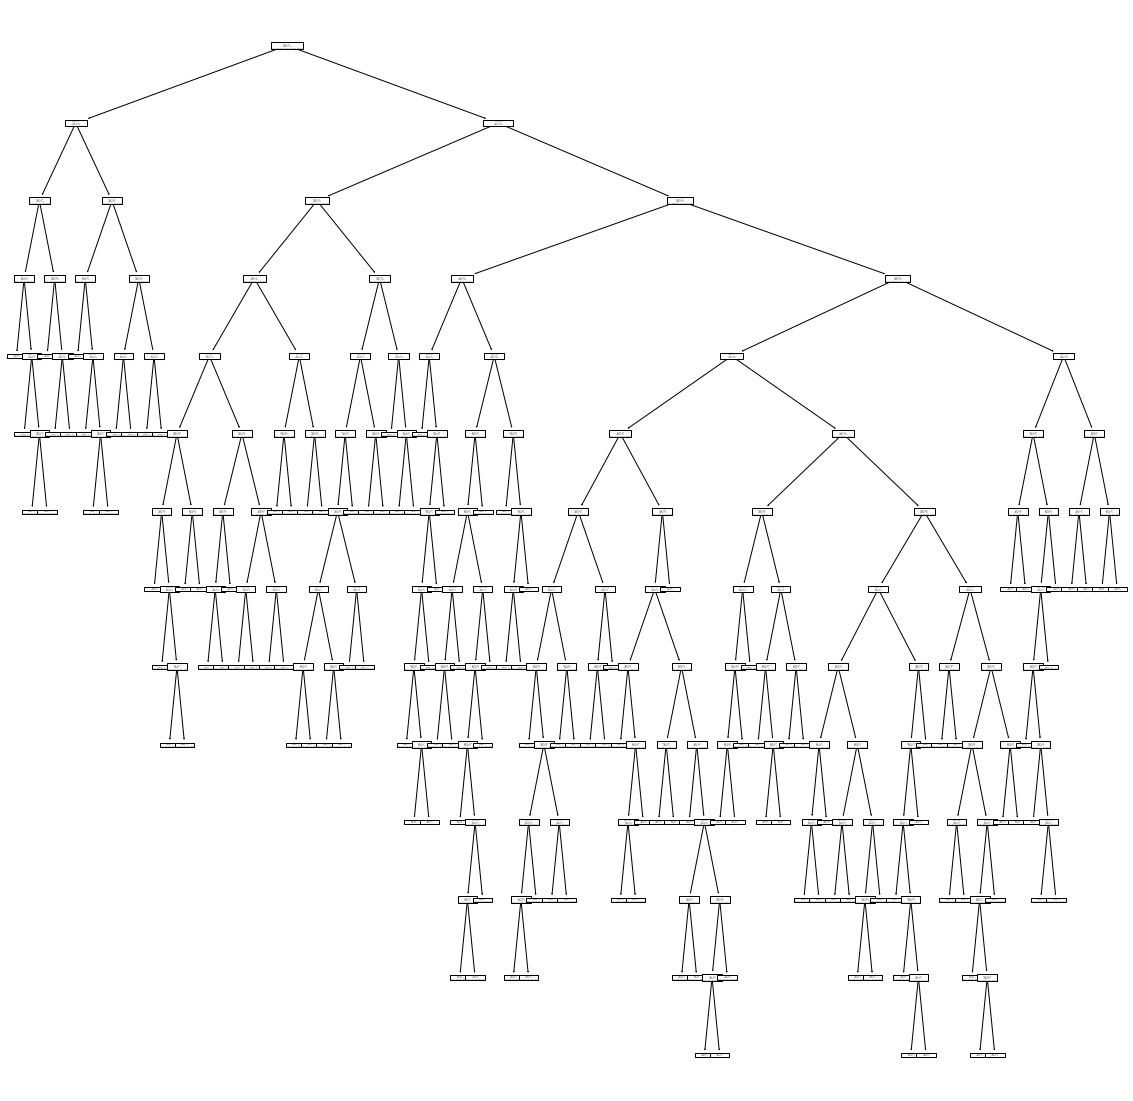

In [47]:
# Visualise the modified tree
plt.figure(figsize=(20,20))
tree.plot_tree(best_sklearnTree)
plt.show()

In [48]:
# Predicting over the test set
y_pred = best_sklearnTree.predict(X_test)

Scikit-learn DecisionTreeClassifier (with modified parameters) on digits dataset... 

classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

----------Classification Report-----
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.88      0.87      0.87        67
           2       0.87      0.91      0.89        57
           3       0.82      0.82      0.82        62
           4       0.91      0.84      0.88        51
           5       0.81      0.86      0.84        51
           6       0.88      0.91      0.89        46
      

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca27952110>)

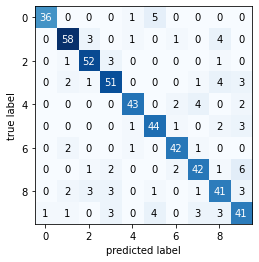

In [49]:
print('Scikit-learn DecisionTreeClassifier (with modified parameters) on digits dataset... \n')
print('classifier: %s\n' % best_classifier)
print('-'*10 + 'Classification Report' + '-'*5)
print(metrics.classification_report(y_test, y_pred))
print('-'*10 + 'Confusion Matrix' + '-'*10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred))

## 2. Decision Tree Classifier using the ID3 algorithm
Implementing our own decision tree classifier based on the ID3 algorithm...

### The ID3 algorithm in pseudocode
```
ID3 (Samples, Target_Attribute, Attributes)
  Create a (root) node Root for the tree

  If all samples belong to one class <class_name>
      Return the single-node tree Root, with label = <class_name>. 
  
  If Attributes is empty, then 
      Return the single node tree Root, with label = most common class value in Samples.
  else 
      Begin
          Let A be the attribute a in Attributes that generates the maximum information gain 
                when the tree is split based on a.

          Set A as the target_attribute of Root

          For each possible value, v, of A, add a new tree branch below Root, 
               corresponding to the test A == v, i.e.,
              Let Samples(v) be the subset of samples that have the value v for A.
              If Samples(v) is empty, then 
                  Below this new branch add a leaf node with label 
                        = most common class value in Samples. 
              else
                  Below this new branch add the subtree ID3 (Samples(v), A, Attributes/{A}) 
        End 
  Return Root
```

_1. Make a decision regarding the data structure that your tree should be able to handle. In the code handout (see above), you will find the tree assumed to be implemented with nodes that are dictionaries._

Using the `Handout_SkeletonDT` code provided to us by _E.A. Topp_ (EDAN95, link [here](http://fileadmin.cs.lth.se/cs/Education/EDAN95/Handouts/DT_LabHandout.zip))

In [50]:
from collections import Counter
from graphviz import Digraph



class ID3DecisionTreeClassifierSkeleton:


    def __init__(self, minSamplesLeaf = 1, minSamplesSplit = 2):
        self.__nodeCounter = 0
        # the graph to visualise the tree
        self.__dot = Digraph(comment='The Decision Tree')
        # suggested attributes of the classifier to handle training parameters
        self.__minSamplesLeaf = minSamplesLeaf
        self.__minSamplesSplit = minSamplesSplit

    # Create a new node in the tree with the suggested attributes for the visualisation.
    # It can later be added to the graph with the respective function
    def new_ID3_node(self):
        node = {'id': self.__nodeCounter, 'label': None, 'attribute': None, 'entropy': None, 'samples': None,
                         'classCounts': None, 'nodes': None}
        self.__nodeCounter += 1
        return node

    # adds the node into the graph for visualisation (creates a dot-node)
    def add_node_to_graph(self, node, parentid=-1):
        nodeString = ''
        for k in node:
            if ((node[k] != None) and (k != 'nodes')):
                nodeString += "\n" + str(k) + ": " + str(node[k])

        self.__dot.node(str(node['id']), label=nodeString)
        if (parentid != -1):
            self.__dot.edge(str(parentid), str(node['id']))
            nodeString += "\n" + str(parentid) + " -> " + str(node['id'])

        print(nodeString)
        return

    # make the visualisation available
    def make_dot_data(self):
        return self.__dot

    # For you to fill in; Suggested function to find the best attribute to split with, given the set of
    # remaining attributes, the currently evaluated data and target.
    def find_split_attr(self):
        # Change this to make some more sense
        return None

    # the entry point for the recursive ID3-algorithm, you need to fill in the calls to your recursive implementation
    def fit(self, data, target, attributes, classes):
        # fill in something more sensible here... root should become the output of the recursive tree creation
        root = self.new_ID3_node()
        self.add_node_to_graph(root)
        return root

    def predict(self, data, tree):
        predicted = list()
        # fill in something more sensible here... root should become the output of the recursive tree creation
        return predicted

_2. Inspect other parts of the code provided. You will find one example for how it is easily possible to construct the visualisation data (`dot-data`) for the `graphviz`-visualisation in parallel to the actual decision tree. Whenever a node is added to the tree, it can also immediately be added to the graph. Feel free to use this for your own implementation._

In [51]:
# Render PDF as rasterized image
!pip install pdf2image

In [52]:
# Install poppler dependency
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (300 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [53]:
# Check if poppler was installed successfully
!pdftoppm -h

pdftoppm version 0.62.0
Copyright 2005-2017 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011 Glyph & Cog, LLC
Usage: pdftoppm [options] [PDF-file [PPM-file-prefix]]
  -f <int>                 : first page to print
  -l <int>                 : last page to print
  -o                       : print only odd pages
  -e                       : print only even pages
  -singlefile              : write only the first page and do not add digits
  -r <fp>                  : resolution, in DPI (default is 150)
  -rx <fp>                 : X resolution, in DPI (default is 150)
  -ry <fp>                 : Y resolution, in DPI (default is 150)
  -scale-to <int>          : scales each page to fit within scale-to*scale-to pixel box
  -scale-to-x <int>        : scales each page horizontally to fit in scale-to-x pixels
  -scale-to-y <int>        : scales each page vertically to fit in scale-to-y pixels
  -x <int>                 : x-coordinate of the crop area top left corner

In [54]:
from pdf2image import convert_from_path
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

def display_tree(filename):
    """
    Converts a PDF file into an image then displays that image.
    Params:
        filename: name of PDF file to convert (with extension)
    """
    path = Path(filename)
    # Remove extension from filename
    img_name = path.with_suffix('')
    pages = convert_from_path(path, dpi=300)
    # Render each page as an image
    for idx,page in enumerate(pages):
        img_path = Path(str(img_name) + '_page' + str(idx)).with_suffix('.jpg')
        page.save(img_path, 'JPEG')
        plt.figure(figsize=(20,20))
        plt.title(img_name)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

_3. Simply running `main` in the handout will produce a tree with one node, visualised in `testTree.pdf`. Make sure that this works, i.e., that you have all the necessary libraries installed._

In [55]:
### From `ToyData.py` in E.A. Topp's `Handout_SkeletonDT`

In [56]:
from collections import OrderedDict


class ToyData:
    def __init__(self):
        self.attributes = OrderedDict(
            [("color", ["y", "g", "b"]), ("size", ["s", "l"]), ("shape", ["r", "i"])]
        )
        self.classes = ('+', '-')
        # Training set data (attribute values)
        self.data = [('y', 's', 'r'),
                 ('y', 's', 'r'),
                 ('g', 's', 'i'),
                 ('g', 'l', 'i'),
                 ('y', 'l', 'r'),
                 ('y', 's', 'r'),
                 ('y', 's', 'r'),
                 ('y', 's', 'r'),
                 ('g', 's', 'r'),
                 ('y', 'l', 'r'),
                 ('y', 'l', 'r'),
                 ('y', 'l', 'r'),
                 ('y', 'l', 'r'),
                 ('y', 'l', 'r'),
                 ('y', 's', 'i'),
                 ('y', 'l', 'i')]
        # Training set labels
        self.target = ('+', '-', '+', '-', '+', '+', '+', '+', '-', '-', '+', '-', '-', '-', '+', '+')
        # Test set data (attribute values)
        self.testData = [('y', 's', 'r'),
                 ('y', 's', 'r'),
                 ('g', 's', 'i'),
                 ('b', 'l', 'i'),
                 ('y', 'l', 'r')]
        # Test set labels
        self.testTarget = ('+', '-', '+', '-', '+')

    def get_data(self):
        return self.attributes, self.classes, self.data, self.target, self.testData, self.testTarget

In [57]:
### From `main.py` in E.A. Topp's `Handout_SkeletonDT`

In [58]:
import numpy as np
from sklearn import tree, metrics, datasets


def main():
    attributes, classes, data, target, data2, target2 = ToyData().get_data()
    id3_test = ID3DecisionTreeClassifierSkeleton()
    myTree = id3_test.fit(data, target, attributes, classes)
    print(myTree)
    plot = id3_test.make_dot_data()
    plot.render("testTree")
    predicted = id3_test.predict(data2, myTree)
    print(predicted)


if __name__ == "__main__": main()


id: 0
{'id': 0, 'label': None, 'attribute': None, 'entropy': None, 'samples': None, 'classCounts': None, 'nodes': None}
[]


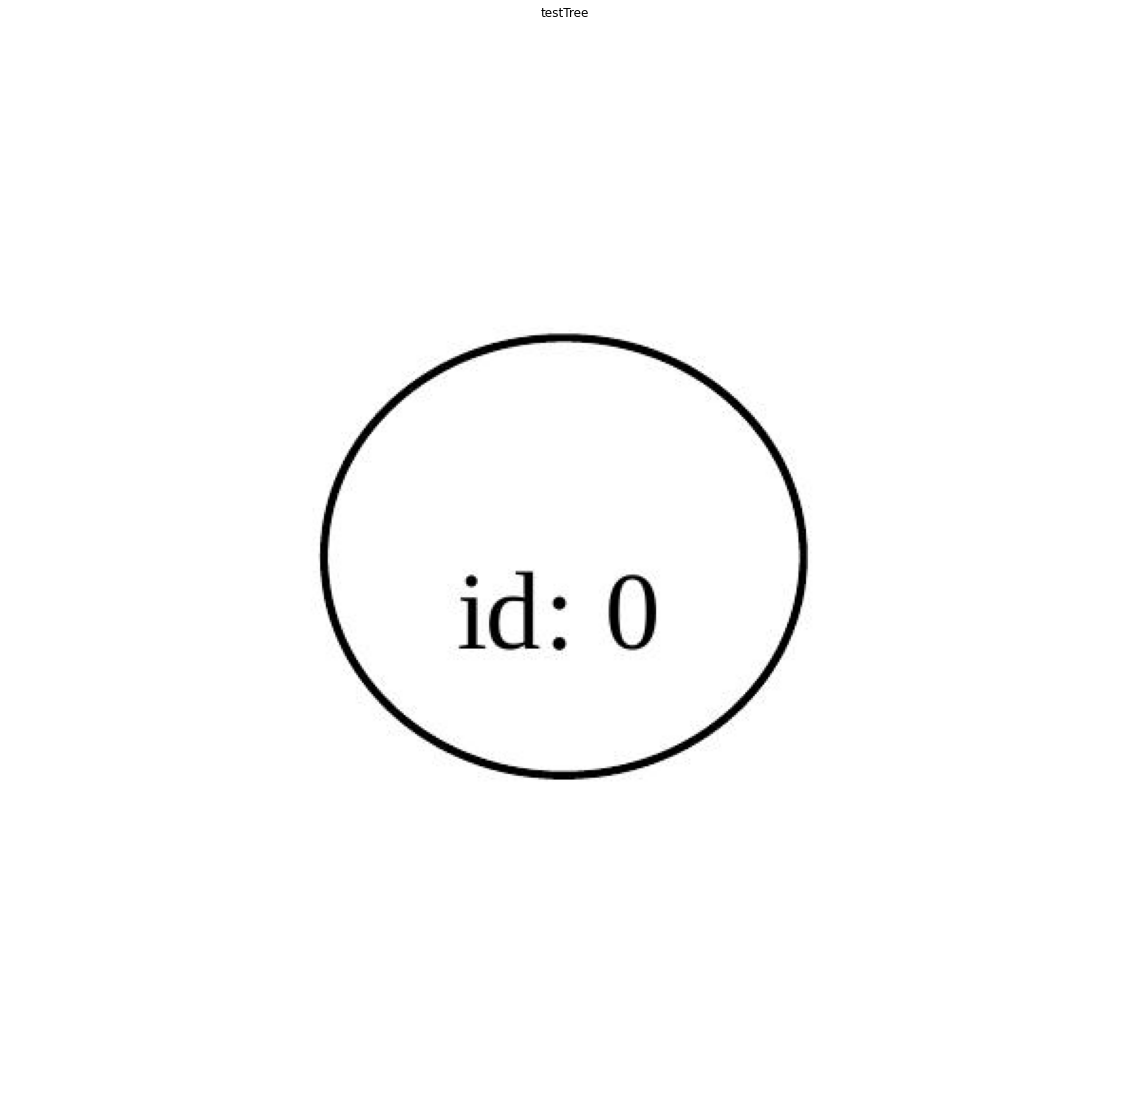

In [59]:
# Visualise the tree and verify that a single node is produced
display_tree('testTree.pdf')

### The ID3 Decision Tree Classifier

_4. The code handout contains a mere skeleton for the ID3 classifier. Implement what is needed to actually construct a decision tree classifier. Implement the ID3 algorithm, e.g., according to what is provided in the lecture or on this page below. Use information gain as criterion for the best split attribute._

In [60]:
from collections import Counter, OrderedDict
from graphviz import Digraph
import math

class ID3DecisionTreeClassifier:
    def __init__(self, minSamplesLeaf = 1, minSamplesSplit = 2) :
        # The number of nodes in the tree
        self.__nodeCounter = 0
        # The graph to visualise the tree
        self.__dot = Digraph(comment='The Decision Tree')
        # Suggested attributes of the classifier to handle training parameters
        self.__minSamplesLeaf = minSamplesLeaf
        self.__minSamplesSplit = minSamplesSplit

    def new_ID3_node(self):
        """
        Create a new node in the tree with the suggested attributes for the visualisation.
        It can later be added to the graph with the respective function
        """
        # The node object implemented with a dictionary 
        node = {'id': self.__nodeCounter, 'label': None, 'attribute': None, 'entropy': None, 'samples': None,
                         'classCounts': None, 'nodes': None}
        # New key to store parent node's attribute value
        node.update({'attribute_value': None})
        # Incremement the counter by one for every new node created
        self.__nodeCounter += 1
        return node

    def add_node_to_graph(self, node, parentid=-1):
        """
        Create a dot-node for visualisation and print the node 
        """
        nodeString = ''
        for k in node:
            if ((node[k] != None) and (k != 'nodes')):
                nodeString += "\n" + str(k) + ": " + str(node[k])

        self.__dot.node(str(node['id']), label=nodeString)
        if (parentid != -1):
            self.__dot.edge(str(parentid), str(node['id']))
            nodeString += "\n" + str(parentid) + " -> " + str(node['id'])
        if self.__verbose:
            print(nodeString)
        return


    # make the visualisation available
    def make_dot_data(self):
        return self.__dot

    def _calc_entropy(self, node):
        """
        Return the entropy score of the data set prior to splitting.
        """
        entropy = 0.0
        # If all targets are of the same class, the entropy value is 0
        if len(node['classCounts'].values()) == 1:
            return entropy
        # Compute the weighted sum of the log of the probabilities
        for count in node['classCounts'].values():
            prob = count / node['samples']
            entropy -= prob * math.log2(prob)
        self._entropy = entropy
        return self._entropy

    def _calc_information_gain(self, target, attributes, node):
        """
        Returns the information gain of each attribute in attributes.
        Information gain is measured as the difference in entropy values calculated 
        before and after the split on the most optimal attribute.
        """
        info_gain = 0
        # Store information gain for each remaining attribute in attributes
        information_gains = {}
        for attribute in attributes:
            # Get entropy of parent node
            info_gain = node['entropy']
            # Store weighted average entropy
            weighted_entropy = 0.0
            # For every attribute value and its indexes in target
            for attribute_value, attribute_idxs in attributes[attribute].items():
                if attribute_idxs:
                    # Get the class labels of the attribute value by index
                    attribute_value_targets = {i:target[i] for i in attribute_idxs if i in target.keys()}
                    # Store the frequencies of each class label
                    classCounts = Counter(attribute_value_targets.values())
                    # Calculate the entropy of each child
                    child_entropy = 0.0
                    for count in classCounts.values():
                        prob = count / len(attribute_value_targets)
                        child_entropy -= prob * math.log2(prob)
                    # Calculate the weighted average entropy score if we were to split at this attribute
                    weighted_entropy += (len(attribute_value_targets) / node['samples']) * child_entropy
                    # Update summed info gain score for this attribute value
                    info_gain -= weighted_entropy
            # Update total information gain for this attribute
            information_gains[attribute] = info_gain
        self._information_gains = information_gains
        return self._information_gains
     
    def _get_best_split(self, target, attributes, node):
        """
        Returns the attribute that has the most predictive power (yields the most information if the data set was split based on that attribute's values). 
        This attribute has the highest information gain.
        """
        info_gains = self._calc_information_gain(target, attributes, node)
        best_split = max(info_gains, key=lambda x: info_gains[x])
        self._best_split = best_split
        return self._best_split


    def build_tree(self, data, target, attributes, classes, attr_val="", parentid=-1):
        """
        The recursive ID3-algorithm. On each iteration, the entropy and information gain of each attribute is calculated. In summary,
           1. Calculate the entropy of every attribute in attributes.
           2. Split the data into subsets using the attribute whose resulting information gain is maximised.
           3. Create a decision tree node using that attribute.
           4. Recursively perform steps 1-3 until the stopping conditions are satisfied.
        """
        # Count the frequencies of each class in target
        classCounts = Counter(target.values())
        # Create new node and update its values
        node = self.new_ID3_node()
        node.update({'samples': len(data)})
        node.update({'classCounts': classCounts})
        node.update({'entropy': self._calc_entropy(node)})
        node.update({'attribute_value': attr_val})
        # Create an empty list to store child nodes
        children = []
        # Stopping condition: no remaining attributes to split on
        if not attributes:
            # Update label of leaf node to be the name of the most frequent class
            # n=1 ensures that we return only the most common element in target
            # [0][0] ensures that we return the label rather than count
            node.update({'label': classCounts.most_common(1)[0][0]})
            # Add the node into the graph for visualisation
            self.add_node_to_graph(node, parentid)
            return node
        # Stopping condition: all samples in target are of the same class
        elif len(classCounts) == 1:
            # Update label of leaf node to be the name of the most frequent class
            node.update({'label': classCounts.most_common(1)[0][0]})
            # Add the node into the graph for visualisation
            self.add_node_to_graph(node, parentid)
            return node
        else:
            # Get the attribute to split on whose values have the highest information gain
            best_attribute = self._get_best_split(target, attributes, node)
            node.update({'attribute': best_attribute})
            # Add the node into the graph for visualisation
            self.add_node_to_graph(node, parentid)
            best_attribute_dict = attributes[best_attribute]
            # Recursively build branches by computing the best remaining attributes to split on
            for attribute_value, attribute_value_idxs in best_attribute_dict.items():
                # Remove the split attribute
                attributes_partitioned = attributes.copy()
                attributes_partitioned.pop(best_attribute, None)
                # Get the samples from data by index that contain the attribute value
                data_partitioned = {idx:data[idx] for idx in attribute_value_idxs if idx in data.keys()}
                # Get the class labels from target that map to the attribute value pairs
                target_partitioned = {idx:target[idx] for idx in attribute_value_idxs if idx in target.keys()}
                # If there are remaining attribute values to split
                if data_partitioned:
                    # Call recursive function to find the next best attribute(s) to split on
                    child = self.build_tree(data_partitioned, target_partitioned, attributes_partitioned, classes, attribute_value, node['id'])
                    # Append the new child node to the list of children
                    children.append(child)
                else:
                    # Create a leaf node
                    child = self.new_ID3_node()
                    # Update leaf node values
                    child.update({'label': classCounts.most_common(1)[0][0]})
                    child.update({'samples': len(attribute_value_idxs)})
                    #child.update({'samples': 0})
                    child.update({'attribute_value': attribute_value})
                    # Add the leaf node into the graph for visualisation
                    self.add_node_to_graph(child, node['id'])
                    children.append(child)
                    
            node.update({'nodes': children})
        return node

    def fit(self, data, target, attributes, classes, dataset="", verbose=False):
        """
        The entry point for the recursive ID3-algorithm. Formats the input data and returns a root to the decision tree.
        """
        # Toggle printing of dot-nodes during training
        self.__verbose = verbose
        # Format the Scikit-learn digits dataset
        if dataset is not "ToyData":
            # Assume attributes is a list with the unique values of all attributes in data
            # Append the list of values as a tuple to every index in the list whose length is equal to the number of attributes in data
            attributes = [tuple(attributes) for i in range(data.shape[1])]
            # Create a dict of attribute values indexed by the number of attributes in data
            attributes = OrderedDict(zip(range(data.shape[1]), attributes))
            # Convert each sample in data (a list of attribute values) to a tuple and store it in a list
            data = [tuple(x) for x in data]
            # Convert the target labels into a tuple
            target = tuple(target)
        # Index the input data
        data_indexed = {i:data[i] for i in range(len(data))}
        target_indexed = {i:target[i] for i in range(len(target))}
        attributes_indexed = {attr:i for i, attr in enumerate(attributes.keys())}    
        # Build nested attribute dict where each attribute value is paired with the indices in data where it occurs
        for i, attribute in enumerate(attributes.keys()):
            # Get the list of attribute values
            attribute_values = attributes[attribute]
            # Build dict to store each attribute value and an empty list for its indices in the data
            attribute_value_idx = {attribute_value:[] for attribute_value in attribute_values}
            # Go through each sample in the data
            for idx, x in data_indexed.items():
                # Get the value of the ith attribute in the sample
                x_value = x[i]
                # Append the sample's index to its matching attribute value in the dict
                attribute_value_idx[x[i]].append(idx)
            # Save the attribute's value-indicies mapping
            attributes[attribute] = attribute_value_idx
        # Build the decision tree using the ID3-algorithm and return its root node
        root = self.build_tree(data_indexed, target_indexed, attributes, classes)
        self._attributes_indexed = attributes_indexed
        self._root = root
        return self._root

    def _predict(self, x, node):
        """
        Helper function to predict the class label of a single instance in the test set by traversing the decision tree until a matching leaf node is found.
        """
        # The leaf node
        if node['label'] is not None:
            # Return its label as the predicted class for sample x
            return node['label']
        # The entry point into the tree traversal
        else:
            # Get the best split attribute at the current node
            best_attribute = node['attribute']
            # Return the value in the sample that belongs to the current split attribute
            attribute_value = x[self._attributes_indexed[best_attribute]]
            # Traverse through the branches
            for child in node['nodes']:
                # If the attribute value is found in the child node (a leaf)
                if attribute_value == child['attribute_value']:
                    # Call the method to return the leaf node label
                    return self._predict(x, child)

    def predict(self, data, tree, dataset=""):
        """
        Predicts the class labels of the test set sample-by-sample by traversing the decision tree built during training.
        """
        predicted = list()
        # Format the dataset
        if dataset is not "ToyData":
            data = [tuple(x) for x in data]
        for x in data:
            # Append the predicted label of x to the list
            predicted.append(self._predict(x, tree)) 
        self.y_pred = predicted
        return self.y_pred

_5. Test your classifier with the toy example provided in the `ToyData` class given in the skeleton. In `main` you can also see how to make use of the dot-data to produce a visualisation with `graphviz`. The tree rendered in the file given to the respective method should look like the one given in `toyTree.pdf`._

In [61]:
# Get dataset from ToyData class
attributes, classes, data, target, data2, target2 = ToyData().get_data()

In [62]:
# Initialise decision tree model
id3 = ID3DecisionTreeClassifier()

In [63]:
# Testing ID3 with ToyData
toyTree = id3.fit(data, target, attributes, classes, dataset="ToyData", verbose=True)


id: 0
attribute: size
entropy: 0.9886994082884974
samples: 16
classCounts: Counter({'+': 9, '-': 7})
attribute_value: 

id: 1
attribute: color
entropy: 0.8112781244591328
samples: 8
classCounts: Counter({'+': 6, '-': 2})
attribute_value: s
0 -> 1

id: 2
attribute: shape
entropy: 0.6500224216483541
samples: 6
classCounts: Counter({'+': 5, '-': 1})
attribute_value: y
1 -> 2

id: 3
label: +
entropy: 0.7219280948873623
samples: 5
classCounts: Counter({'+': 4, '-': 1})
attribute_value: r
2 -> 3

id: 4
label: +
entropy: 0.0
samples: 1
classCounts: Counter({'+': 1})
attribute_value: i
2 -> 4

id: 5
attribute: shape
entropy: 1.0
samples: 2
classCounts: Counter({'+': 1, '-': 1})
attribute_value: g
1 -> 5

id: 6
label: -
entropy: 0.0
samples: 1
classCounts: Counter({'-': 1})
attribute_value: r
5 -> 6

id: 7
label: +
entropy: 0.0
samples: 1
classCounts: Counter({'+': 1})
attribute_value: i
5 -> 7

id: 8
label: +
samples: 0
attribute_value: b
1 -> 8

id: 9
attribute: shape
entropy: 0.954434002924

In [64]:
# Visualise tree with Graphviz
plot = id3.make_dot_data()
# Render tree in PDF
plot.render('myToyTree')

'myToyTree.pdf'

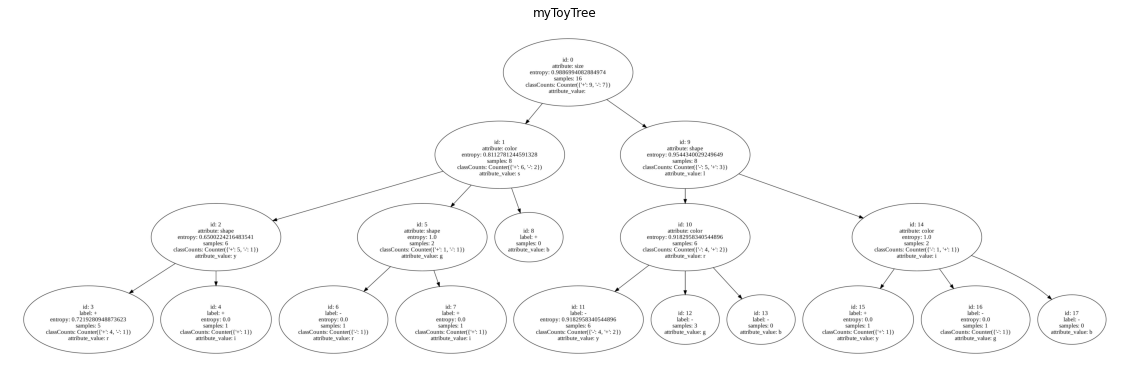

In [65]:
display_tree('myToyTree.pdf')

### Predicting with a Decision Tree
The prediction (finding the class for an example `x`) with a decision tree boils then obviously down to a tree search, which follows the branch of the tree that represents the combinations of attribute values given in `x` until a leaf is reached. The predicted class for `x` is then the class that the leaf is labelled with. This is, again, easiest implemented recursively:

```
predict_rek( node, x)
    if node is leaf
        return the class label of node
    else
        find the child c among the children of node
             representing the value that x has for
             the split_attribute of node
        return predict_rek( c, x)
```

In [66]:
# Run prediction over test data
y_pred = id3.predict(data2, toyTree)

ID3 Decision Tree Classifier on ToyData dataset... 

----------Classification Report-----
              precision    recall  f1-score   support

           +       0.67      0.67      0.67         3
           -       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

----------Confusion Matrix----------


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca225a9410>)

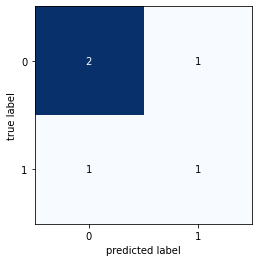

In [67]:
print('ID3 Decision Tree Classifier on ToyData dataset... \n')
print('-'*10 + 'Classification Report' + '-'*5)
print(metrics.classification_report(target2, y_pred))
print('-'*10 + 'Confusion Matrix' + '-'*10)
plot_confusion_matrix(metrics.confusion_matrix(target2, y_pred))

### Testing ID3 with Scikit-learn digits

_6. When you are sure that everything works properly, run the ID3-training for the digits training data you used in part 1. Do not constrain the training, i.e., run with default parameters. What do you see in the plot? Analyse the result (produce a confusion matrix and a classification report) and compare with the result from part 1 (when running with default parameters)._

In [68]:
# Split digits data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [69]:
# Get attributes and classes for digits data
attributes = list(np.unique(X_train))
# Convert to tuple format for ID3 classifier
classes = tuple(np.unique(y_train))

In [70]:
# Initialise decision tree model
id3 = ID3DecisionTreeClassifier()

In [71]:
# Fit ID3 on digits training data (build tree)
digitsTree = id3.fit(X_train, y_train, attributes, classes, dataset="digits", verbose=False)

In [72]:
# Visualise tree with Graphviz
plot = id3.make_dot_data()
# Render tree in PDF
plot.render("myDigitsTree")

'myDigitsTree.pdf'

Due to the size of the tree, we’re unable to render it on a single PDF page.

In [73]:
# Prediction over digits test data
y_pred = id3.predict(X_test, digitsTree, dataset="digits")

ID3 Decision Tree Classifier on Scikit-learn digits dataset... 

----------Classification Report-----
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        52
           1       0.34      0.24      0.28        62
           2       0.26      0.28      0.27        43
           3       0.29      0.28      0.28        57
           4       0.36      0.39      0.38        56
           5       0.33      0.26      0.29        57
           6       0.45      0.59      0.51        54
           7       0.68      0.68      0.68        53
           8       0.18      0.17      0.17        58
           9       0.15      0.17      0.16        48

    accuracy                           0.36       540
   macro avg       0.36      0.36      0.36       540
weighted avg       0.36      0.36      0.36       540

----------Confusion Matrix----------


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca224edb50>)

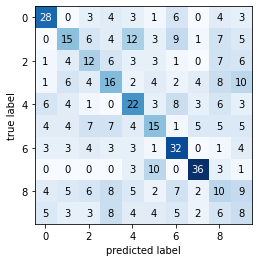

In [74]:
print('ID3 Decision Tree Classifier on Scikit-learn digits dataset... \n')
print('-'*10 + 'Classification Report' + '-'*5)
print(metrics.classification_report(y_test, y_pred))
print('-'*10 + 'Confusion Matrix' + '-'*10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred))

In [75]:
# Reshape data to 3D for visualisation
dim = int(np.sqrt(X_test.shape[1]))
X_test_images = X_test.reshape((len(X_test), dim, dim))

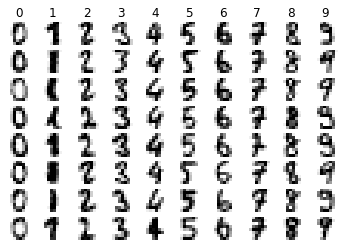

In [76]:
# Visualise random examples from digits dataset
visualize_random(X_test_images, y_test, examples_per_class=8)

In [77]:
# Convert predictions into numpy array
y_pred = np.array(y_pred)

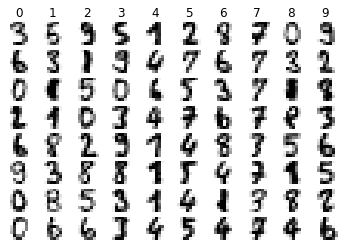

In [78]:
# Visualise the images and their predicted labels
visualize_predictions(X_test_images, y_pred, examples_per_class=8)

### Testing ID3 with modified Scikit-learn digits

_7. One striking difference should be in the ratio of breadth and depth of the two trees. Why is that the case? Modify your data set to contain only three values for the attributes (instead of potentially 16), e.g., 'dark', 'grey', and 'light', with for example 'dark' representing pixel values <5.0, and 'light' those >10.0. Train and test the classifier again. Do your results improve? Can you match the SKLearn implementation's accuracy? If not, why do you think this is the case?_

Bins:
*  `Light`: 0-4  –>  0
*  `Grey`: 5-10 –>  1
*  `Dark`: 11-16 –>  2

In [79]:
bin_bounds = [4, 10]
digits_data_summarised = np.digitize(digits.data, bins=bin_bounds, right=True)
digits_target_summarised = digits.target

In [80]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(digits_data_summarised, digits_target_summarised, test_size=0.3)

In [81]:
# Get attributes and classes for digits data
attributes_bin = list(np.unique(X_train_bin))
# Convert to tuple format for ID3 classifier
classes_bin = tuple(np.unique(y_train_bin))

In [82]:
# Initialise decision tree model
id3 = ID3DecisionTreeClassifier()

In [83]:
# Fit ID3 on digits summarised training data
digitsSummarisedTree = id3.fit(X_train_bin, y_train_bin, attributes_bin, classes_bin, dataset="digits_summarised")

In [84]:
# Visualise tree with Graphviz
plot = id3.make_dot_data()
# Render tree in PDF
plot.render("myDigitsSummarisedTree")

'myDigitsSummarisedTree.pdf'

Due to the size of the tree, we’re unable to render it on a single PDF page.

In [85]:
# Prediction over digits summarised test data
y_pred = id3.predict(X_test_bin, digitsSummarisedTree, dataset="digits_summarised")

ID3 Decision Tree Classifier on Scikit-learn digits (summarised) dataset... 

----------Classification Report-----
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.57      0.56      0.57        48
           2       0.55      0.67      0.60        51
           3       0.72      0.63      0.67        60
           4       0.79      0.76      0.78        50
           5       0.69      0.69      0.69        61
           6       0.74      0.67      0.70        51
           7       0.87      0.79      0.83        58
           8       0.48      0.52      0.50        52
           9       0.60      0.70      0.65        47

    accuracy                           0.69       540
   macro avg       0.69      0.68      0.68       540
weighted avg       0.70      0.69      0.69       540

----------Confusion Matrix----------


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca22246ed0>)

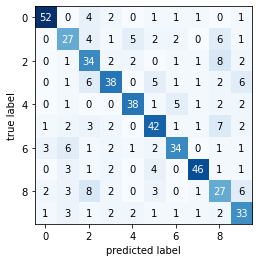

In [86]:
print('ID3 Decision Tree Classifier on Scikit-learn digits (summarised) dataset... \n')
print('-'*10 + 'Classification Report' + '-'*5)
print(metrics.classification_report(y_test_bin, y_pred))
print('-'*10 + 'Confusion Matrix' + '-'*10)
plot_confusion_matrix(metrics.confusion_matrix(y_test_bin, y_pred))

In [87]:
# Reshape the test data to 3D for visualisation
dim = int(np.sqrt(X_test_bin.shape[1]))
X_test_bin_images = X_test_bin.reshape((len(X_test_bin),dim,dim))

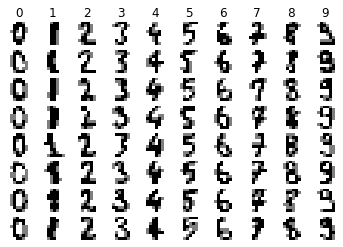

In [88]:
# Visualise random images from digits summarised dataset
visualize_random(X_test_bin_images, y_test_bin, examples_per_class=8)

In [89]:
# Convert predictions into numpy array
y_pred = np.array(y_pred)

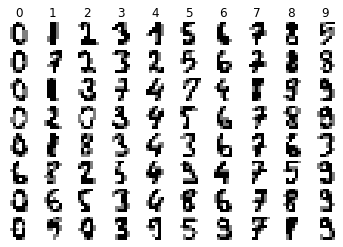

In [90]:
# Visualise the images and their predicted labels
visualize_predictions(X_test_bin_images, y_pred, examples_per_class=8)

_8. (Bonus: If interested, explore the effects of different parameters regulating the depth of the tree, the maximum number of samples per leaf or required for a split, initially on the SKLearn version, but of course you can also implement them for your own classifier.)_

## Credits
This assignment was prepared by E.A. Topp et al., HT2019 (link [here](https://web.archive.org/web/20200111075039/http://cs.lth.se/edan95/lab-programming-assignments/lab-session-2/)).

Most of the code in this notebook was inspired by A. Sears-Collins' [Iterative Dichotomiser 3 Algorithm in Python](https://automaticaddison.com/iterative-dichotomiser-3-id3-algorithm-from-scratch/).


Additional credits:

* KDnuggets - [Decision Tree Algorithm, Explained](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html).

* GridSearchCV plotting method - [sus_hml](https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv/57013458#57013458).